In [ ]:
#gradient norm

Beginning training
Epoch - 0, Loss - 0.1578
Epoch - 400, Loss - 0.0047
Epoch - 800, Loss - 0.0020
Epoch - 1200, Loss - 0.0011
Convergence reached for loss: 0.0009997608


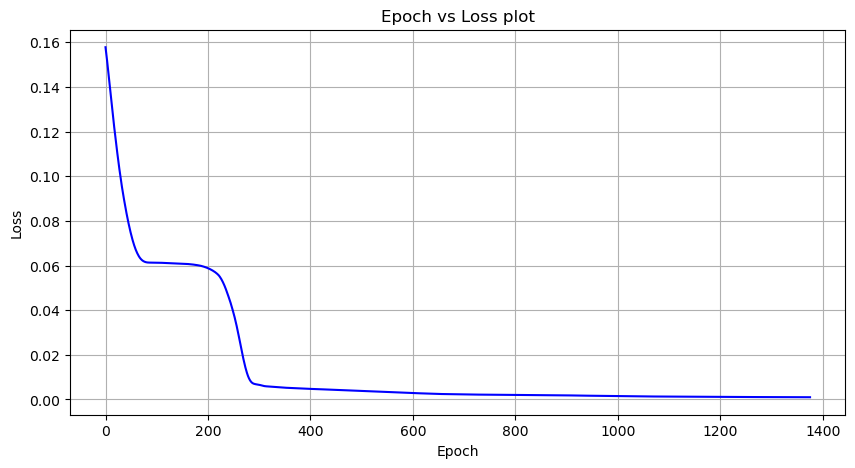

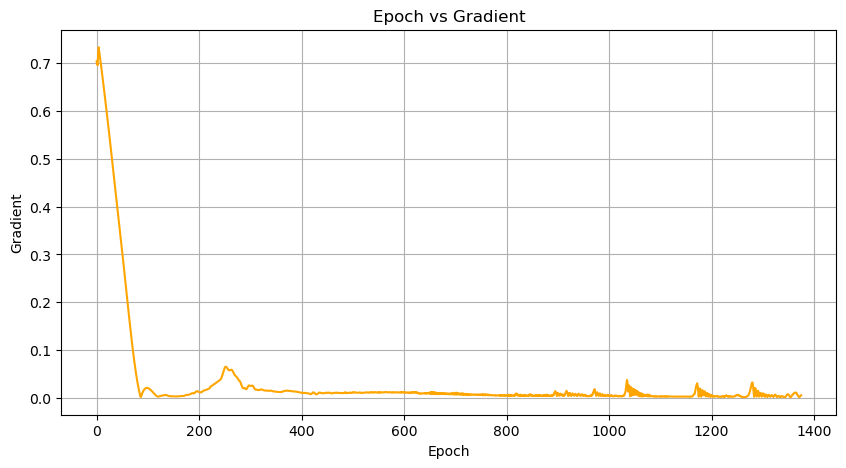

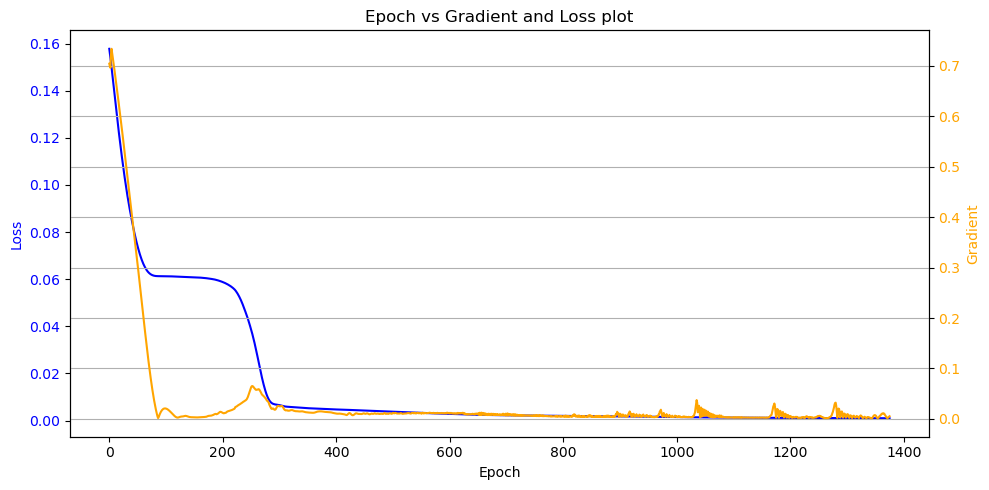

In [7]:
#Task_2_Gradient_norm
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

# Define the input
ip = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)

# Use sinc() function to generate output
op = np.sinc(5 * ip)

# Convert numpy arrays to tensors
x = torch.tensor(ip, dtype=torch.float32)
y = torch.tensor(op, dtype=torch.float32)

# Define the neural network model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(1, 4)
        self.l2 = nn.Linear(4, 9)
        self.l3 = nn.Linear(9, 12)
        self.l4 = nn.Linear(12, 10)
        self.l5 = nn.Linear(10, 10)
        self.l6 = nn.Linear(10, 10)
        self.l7 = nn.Linear(10, 4)
        self.l8 = nn.Linear(4, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.l1(x))
        x = nn.functional.leaky_relu(self.l2(x))
        x = nn.functional.leaky_relu(self.l3(x))
        x = nn.functional.leaky_relu(self.l4(x))
        x = nn.functional.leaky_relu(self.l5(x))
        x = nn.functional.leaky_relu(self.l6(x))
        x = nn.functional.leaky_relu(self.l7(x))
        x = self.l8(x)
        return x

# Instantiate the model
model = Model()

# Define the training function
def train_model(model, x, y):
    epoch_size = 2500  # Adjusted for similar length as your image
    loss_arr = []
    epoch_arr = []
    grad_arr = []
    converged = False
    print('Beginning training')

    for epoch in range(epoch_size):
        if converged:
            return epoch_arr, loss_arr, y_prediction, grad_arr

        y_prediction = model(x)
        loss = loss_func(y_prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        # Calculate the gradient
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy() ** 2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_arr.append(grad_norm)

        if epoch % 400 == 0:
            print(f'Epoch - {epoch}, Loss - {loss.item():.4f}')

        if (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:", loss_arr[-1])
                converged = True

    print('Training Completed')
    return epoch_arr, loss_arr, y_prediction, grad_arr

# Training setup
# Increased learning rate and reduced weight decay for more fluctuations
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Train the model
epoch_arr, loss_arr, prediction, grad_arr = train_model(model, x, y)

# Plot for epoch vs. loss
plt.figure(figsize=(10, 5))
plt.plot(epoch_arr, loss_arr, color="blue")  # Changed color to green for loss
plt.title('Epoch vs Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot for epoch vs. gradient
plt.figure(figsize=(10, 5))
plt.plot(epoch_arr, grad_arr, color="orange")  # Changed color to blue for gradient
plt.title('Epoch vs Gradient')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.grid(True)
plt.show()

# Plot for epoch vs. loss and gradient together
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting loss with new color
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color="blue")
ax1.plot(epoch_arr, loss_arr, color="blue", label="Loss")
ax1.tick_params(axis='y', labelcolor="blue")

# Creating another y-axis for gradient with a new color
ax2 = ax1.twinx()
ax2.set_ylabel('Gradient', color="orange")
ax2.plot(epoch_arr, grad_arr, color="orange", label="Gradient")
ax2.tick_params(axis='y', labelcolor="orange")

plt.title('Epoch vs Gradient and Loss plot')
fig.tight_layout()  # To ensure there's no overlap
plt.grid(True)
plt.show()
